In [6]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

# 解析日志的函数
def parse_logs(log_lines):
    # 初始化存储结构
    data = defaultdict(lambda: defaultdict(list))
    current_ranging_counter = None

    # 正则表达式匹配
    ranging_ready_pattern = re.compile(r"I: Ranging data ready (\d+)")
    channel_data_pattern = re.compile(r"I: ch\[(\d+)\] : ([\-\d\.]+) radians")

    # 逐行解析日志
    for line in log_lines:
        # 检查是否是新的探测次数
        ranging_match = ranging_ready_pattern.search(line)
        if ranging_match:
            current_ranging_counter = int(ranging_match.group(1))
            continue

        # 检查是否是信道数据
        channel_match = channel_data_pattern.search(line)
        if channel_match and current_ranging_counter is not None:
            channel = int(channel_match.group(1))
            phase = float(channel_match.group(2))
            # 存储数据
            data[current_ranging_counter][channel].append(phase)

    return data

# 从文件加载日志数据
def load_log_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        log_lines = file.readlines()
    return log_lines

# 绘图函数
def plot_data(parsed_data, ranging_counter):
    if ranging_counter not in parsed_data:
        print(f"No data for ranging counter {ranging_counter}")
        return

    channels = parsed_data[ranging_counter]
    for channel, phases in channels.items():
        plt.plot([channel] * len(phases), phases, 'o', label=f"Channel {channel}")

    plt.xlabel("Channel Number")
    plt.ylabel("Phase (radians)")
    plt.title(f"Ranging Counter {ranging_counter} - Phase vs Channel")
    plt.legend()
    plt.grid()
    plt.show()

# 主函数
if __name__ == "__main__":
    # 替换为你的 txt 文件路径
    # file_path = "cs15ch.txt"
    file_path = "cs.full.ch.txt"

    # 加载日志文件
    log_lines = load_log_file(file_path)

    # 解析日志数据
    parsed_data = parse_logs(log_lines)

    # 打印解析结果
    for ranging_counter, channels in parsed_data.items():
        print(f"Ranging Counter: {ranging_counter}")
        for channel, phases in channels.items():
            print(f"  Channel {channel}: {phases}")

    # # 绘制第 0 次信道探测的结果
    # plot_data(parsed_data, ranging_counter=0)

    # # 绘制第 1 次信道探测的结果
    # plot_data(parsed_data, ranging_counter=1)

Ranging Counter: 0
  Channel 2: [2.243408, 2.20642]
  Channel 3: [2.198165, 2.130851, 2.08366]
  Channel 4: [2.028903, 2.077958]
  Channel 5: [1.939919, 2.044717]
  Channel 6: [1.876709, 1.743157]
  Channel 7: [1.79841, 1.690115]
  Channel 8: [1.631814, 1.584272]
  Channel 9: [1.457459, 1.471017, 1.509586]
  Channel 10: [1.345983, 1.423412]
  Channel 11: [1.298513, 1.314919]
  Channel 12: [1.16912, 1.071697]
  Channel 13: [1.25728, 1.235896]
  Channel 14: [1.278757, 1.21678, 1.173216]
  Channel 15: [1.134398, 1.125108, 1.169996]
  Channel 16: [1.243847, 1.09647]
  Channel 17: [1.158206, 1.121598, 1.182868]
  Channel 18: [1.124058, 1.25577]
  Channel 19: [1.064159, 1.04346, 1.09656]
  Channel 20: [1.106035, 1.099375]
  Channel 21: [1.035423, 1.115345, 1.159559]
  Channel 22: [1.095308, 1.066738]
  Channel 26: [0.934721, 0.973453]
  Channel 27: [0.879534, 0.981617]
  Channel 28: [0.940965, 0.900873]
  Channel 29: [0.933733, 0.845801]
  Channel 30: [0.940649, 1.060261]
  Channel 31: [0.87

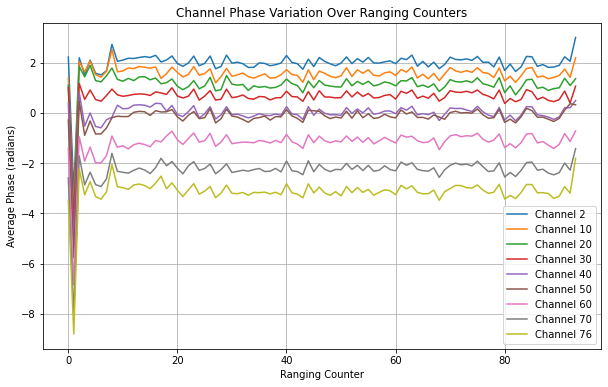

In [8]:
# 计算信道平均相位值的函数
def calculate_channel_averages(parsed_data):
    channel_averages = defaultdict(list)  # 每个信道的平均相位值列表

    # 遍历每次信道探测的结果
    for ranging_counter, channels in parsed_data.items():
        for channel, phases in channels.items():
            # 计算均值并保存
            average_phase = sum(phases) / len(phases)
            channel_averages[channel].append((ranging_counter, average_phase))

    return channel_averages

# 绘制信道变化曲线的函数
def plot_channel_variation(channel_averages, channels_to_plot):
    plt.figure(figsize=(10, 6))

    for channel in channels_to_plot:
        if channel in channel_averages:
            data = channel_averages[channel]
            ranging_counters = [item[0] for item in data]  # 信道探测次数
            average_phases = [item[1] for item in data]    # 平均相位值
            plt.plot(ranging_counters, average_phases, label=f"Channel {channel}")
        else:
            print(f"Channel {channel} not found in the data.")

    plt.xlabel("Ranging Counter")
    plt.ylabel("Average Phase (radians)")
    plt.title("Channel Phase Variation Over Ranging Counters")
    plt.legend()
    plt.grid()
    plt.show()


# 计算每个信道的平均相位值
channel_averages = calculate_channel_averages(parsed_data)

# 指定要绘制的信道
channels_to_plot = [2, 10, 20, 30, 40, 50, 60, 70, 76]  # 你可以修改为需要展示的信道
plot_channel_variation(channel_averages, channels_to_plot)